In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

driver = webdriver.Safari()  # Ou webdriver.Chrome() si tu préfères



In [3]:
url = 'https://books.toscrape.com/'

In [4]:
driver.get(url)

In [5]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'product_pod')))

<selenium.webdriver.remote.webelement.WebElement (session="5C7BF34F-832E-4D05-9AC9-446B95DCFC25", element="node-D64BA01B-28BE-49F2-8E8F-91E6E6F40E9C")>

In [6]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [7]:
books = soup.find_all('article', class_='product_pod')

In [8]:
book_list = []

In [9]:
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    link = book.h3.a['href']
    full_link = 'https://books.toscrape.com/catalogue/' + link.replace('../', '')
    
    book_list.append({
        'Title': title,
        'Price': price,
        'Availability': availability,
        'Link': full_link
    })
    

In [10]:
df = pd.DataFrame(book_list)

In [11]:
df.head()

,Title,Price,Availability,Link
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...


In [12]:
driver.quit()

In [13]:
# TODO
import re

def extract_price_details(price):
    if pd.isna(price) or price == 'N/A':
        return None, None
    match = re.match(r'([£$€])([0-9]+\.[0-9]{2})', price)
    if match:
        currency = match.group(1)
        amount = match.group(2)
        return currency, amount
    return None, None
df[['Currency', 'Price_Value']] = df['Price'].apply(
    lambda x: pd.Series(extract_price_details(x))
)

df.head()


,Title,Price,Availability,Link,Currency,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,£,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,£,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,£,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,£,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,£,54.23


### Variables:

- **Title** : it's a categorical variable that show the title of the book.

- **Price** : it's a continuous variable that show the price with the currency.

- **Availability** : This variable is Categorical, it shows if the book is out of stock or not.

- **Link** : This categorical variable chose the link of each book in the web site.

- **Currency**: The variable Currency is categorical, it shows the currency of the price.

- **Price_Value**: This variable is Continuous, it shows the price value of the book.


In [14]:
df.dtypes

Title           object
Price           object
Availability    object
Link            object
Currency        object
Price_Value     object
dtype: object

In [15]:
df.value_counts

<bound method DataFrame.value_counts of                                                 Title   Price Availability  \
0                                A Light in the Attic  £51.77     In stock   
1                                  Tipping the Velvet  £53.74     In stock   
2                                          Soumission  £50.10     In stock   
3                                       Sharp Objects  £47.82     In stock   
4               Sapiens: A Brief History of Humankind  £54.23     In stock   
5                                     The Requiem Red  £22.65     In stock   
6   The Dirty Little Secrets of Getting Your Dream...  £33.34     In stock   
7   The Coming Woman: A Novel Based on the Life of...  £17.93     In stock   
8   The Boys in the Boat: Nine Americans and Their...  £22.60     In stock   
9                                     The Black Maria  £52.15     In stock   
10     Starving Hearts (Triangular Trade Trilogy, #1)  £13.99     In stock   
11                      

In [16]:
df.isna()

,Title,Price,Availability,Link,Currency,Price_Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Title           0
Price           0
Availability    0
Link            0
Currency        0
Price_Value     0
dtype: int64

In [18]:
df_clean=df.drop(['Currency'], axis=1)
df_clean

,Title,Price,Availability,Link,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,54.23
5,The Requiem Red,£22.65,In stock,https://books.toscrape.com/catalogue/catalogue...,22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,https://books.toscrape.com/catalogue/catalogue...,33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,https://books.toscrape.com/catalogue/catalogue...,17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,https://books.toscrape.com/catalogue/catalogue...,22.60
9,The Black Maria,£52.15,In stock,https://books.toscrape.com/catalogue/catalogue...,52.15


In [19]:
df_clean['Price_Value'] = pd.to_numeric(df_clean['Price_Value'], errors='coerce')


In [20]:
df_clean.dtypes

Title            object
Price            object
Availability     object
Link             object
Price_Value     float64
dtype: object

In [21]:
df

,Title,Price,Availability,Link,Currency,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,£,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,£,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,£,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,£,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,£,54.23
5,The Requiem Red,£22.65,In stock,https://books.toscrape.com/catalogue/catalogue...,£,22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,https://books.toscrape.com/catalogue/catalogue...,£,33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,https://books.toscrape.com/catalogue/catalogue...,£,17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,https://books.toscrape.com/catalogue/catalogue...,£,22.60
9,The Black Maria,£52.15,In stock,https://books.toscrape.com/catalogue/catalogue...,£,52.15


In [22]:
df_clean.dropna()

,Title,Price,Availability,Link,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,54.23
5,The Requiem Red,£22.65,In stock,https://books.toscrape.com/catalogue/catalogue...,22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,https://books.toscrape.com/catalogue/catalogue...,33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,https://books.toscrape.com/catalogue/catalogue...,17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,https://books.toscrape.com/catalogue/catalogue...,22.60
9,The Black Maria,£52.15,In stock,https://books.toscrape.com/catalogue/catalogue...,52.15


In [23]:
df_clean.isna().sum()

Title           0
Price           0
Availability    0
Link            0
Price_Value     0
dtype: int64

In [24]:
df_clean

,Title,Price,Availability,Link,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,54.23
5,The Requiem Red,£22.65,In stock,https://books.toscrape.com/catalogue/catalogue...,22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,https://books.toscrape.com/catalogue/catalogue...,33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,https://books.toscrape.com/catalogue/catalogue...,17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,https://books.toscrape.com/catalogue/catalogue...,22.60
9,The Black Maria,£52.15,In stock,https://books.toscrape.com/catalogue/catalogue...,52.15


In [25]:

df_clean = df_clean.drop_duplicates()
df_clean

,Title,Price,Availability,Link,Price_Value
0,A Light in the Attic,£51.77,In stock,https://books.toscrape.com/catalogue/catalogue...,51.77
1,Tipping the Velvet,£53.74,In stock,https://books.toscrape.com/catalogue/catalogue...,53.74
2,Soumission,£50.10,In stock,https://books.toscrape.com/catalogue/catalogue...,50.10
3,Sharp Objects,£47.82,In stock,https://books.toscrape.com/catalogue/catalogue...,47.82
4,Sapiens: A Brief History of Humankind,£54.23,In stock,https://books.toscrape.com/catalogue/catalogue...,54.23
5,The Requiem Red,£22.65,In stock,https://books.toscrape.com/catalogue/catalogue...,22.65
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock,https://books.toscrape.com/catalogue/catalogue...,33.34
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock,https://books.toscrape.com/catalogue/catalogue...,17.93
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock,https://books.toscrape.com/catalogue/catalogue...,22.60
9,The Black Maria,£52.15,In stock,https://books.toscrape.com/catalogue/catalogue...,52.15


In [26]:
df_clean.duplicated().sum()

np.int64(0)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         20 non-null     object 
 1   Price         20 non-null     object 
 2   Availability  20 non-null     object 
 3   Link          20 non-null     object 
 4   Price_Value   20 non-null     float64
dtypes: float64(1), object(4)
memory usage: 928.0+ bytes


In [28]:
df_clean.describe()

,Price_Value
count,20.000000
mean,38.048500
std,15.135231
min,13.990000
25%,22.637500
50%,41.380000
75%,51.865000
max,57.250000


In [29]:
Q1=df_clean['Price_Value'].quantile(0.25)
Q3=df_clean['Price_Value'].quantile(0.75)
IQr=Q3-Q1
print (IQr)

29.227500000000003


In [30]:
lower_bound=Q1-1.5*IQr
upper_bound=Q3+1.5*IQr
print (f'lower_bound={lower_bound}, upper_bound={upper_bound}')

lower_bound=-21.203750000000003, upper_bound=95.70625000000001


In [31]:
outliers=df_clean[(df_clean['Price_Value']<lower_bound)  | (df_clean['Price_Value']>upper_bound)]

print (f"len(outliers)={len(outliers)}")

len(outliers)=0


In [32]:
outliers['Price_Value'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price_Value, dtype: float64

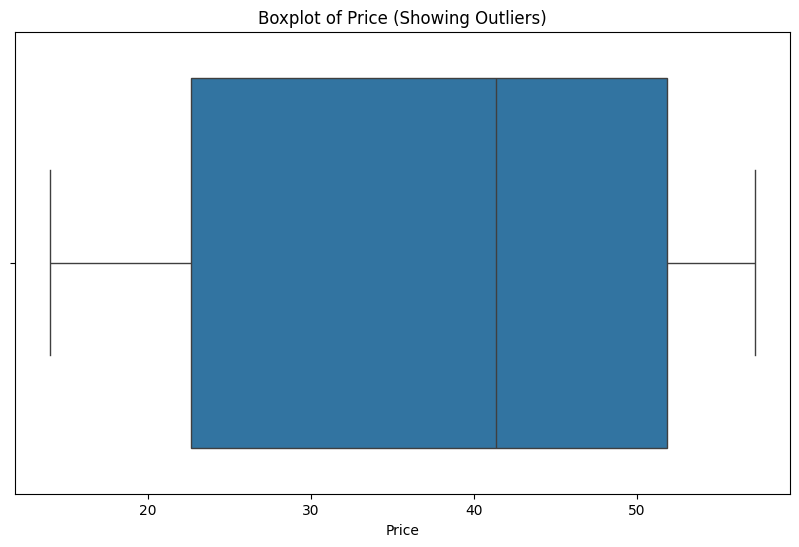

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Price_Value'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

In [34]:
df_clean_clean = df_clean[(df_clean['Price_Value'] >= lower_bound) & (df_clean['Price_Value'] <= upper_bound)]

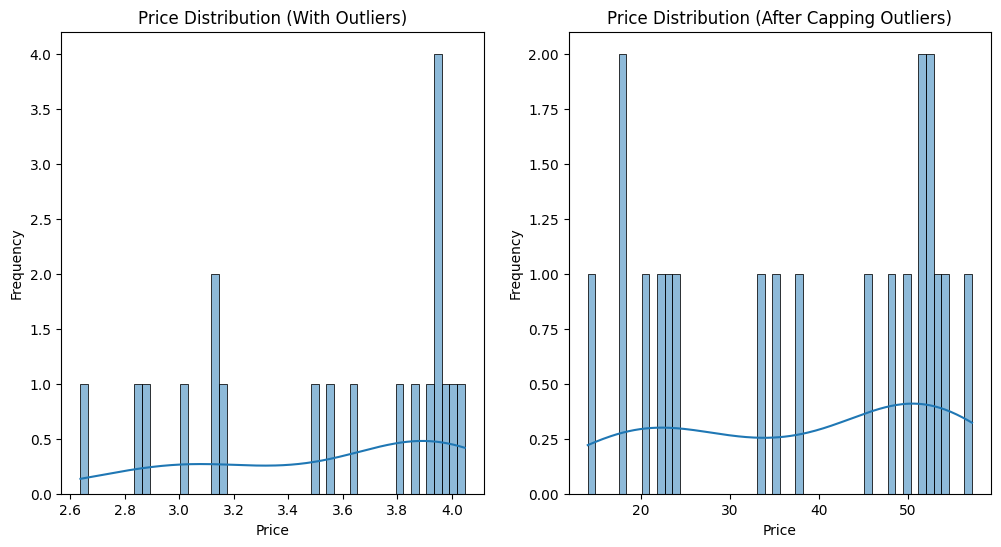

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(np.log(df_clean['Price_Value']), kde=True, bins=50)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['Price_Value'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.show()

In [36]:
df_clean.to_csv('webscrapping_book.csv')